#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 2 (30 marks)**

##**Submission Instruction**
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A2_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [ ]:
# Student ID: 219155861

# Student name: Naveen Chuka Radhakrishna

## Part 1: Clustering *(15 marks)*

Let's assume you want to design an environment to predict a class/category from a dataset based on specific features of that class. However, all the features are not strong enough or in other words features not that much variance/uniqueness across the classes. So, you have to design a clustering model by answering the following questions:

1. Download the attached clustering.csv file. Read the file and separate the class and feature matrix. __(2 marks)__

In [110]:
# INSERT your code (or comment) here
import pandas as pd
import numpy as np
# read csv file
clustering_Data= pd.read_csv("/content/sample_data/clustering.csv")
#Getting Class column 
class_Data=clustering_Data['Class']
#removing Class column
feature_Matrix= clustering_Data.drop(['Class'], axis=1)
feature_Matrix

,height,length,width,std,min,max,kurtosis
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


2. Determine the number of clusters from the dataset. Is this same as the actual number of classes in the dataset? __(1 marks)__

<!-- Choose the best three features using different selection criteria (ANOVA, Chi-squared) based on the purity score for the k-mean cluster (Euclidean distance matrix). Which one is good and why? __(5 marks)__ -->

The Unique classes in the dataset are: [2, 1, 0]


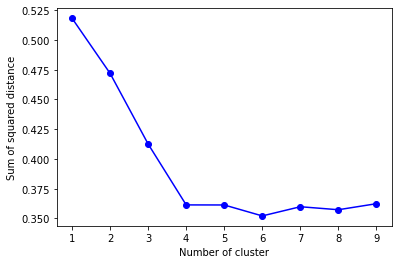

In [114]:
# INSERT your code (or comment) here
#silhouette method is used to find out the clusters in the dataset
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sil = []   #Empty List is created
kmax = 10
kRange = range(1,10)

# the minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(feature_Matrix) #kmeans is applied 
  labels = kmeans.labels_
  sil.append(silhouette_score(feature_Matrix, labels, metric = 'euclidean')) #Eulidean metric is applied
plt.plot(kRange, sil, "bx-", marker='o')
plt.ylabel("Sum of squared distance")
plt.xlabel("Number of cluster")
# The number of classes in the dataset is 3 and the acutual classes is also 3
print(f"The Unique classes in the dataset are: {list(class_Data.value_counts().index)}")



3. Perform K-Means clustering on the complete dataset and report purity score. __(2 marks)__ 

In [115]:
# INSERT your code (or comment) here
from collections import Counter, defaultdict
import numpy as np
from sklearn import metrics

# Kmeans instance is created with 3 clusters
kmeans = KMeans(n_clusters = 3, init='random')
#The feature matrix is sclaed
featur_Scaledmatrix=scale(feature_Matrix)
#feature scaled matrix is fit to the kmeans
kmeans = kmeans.fit(featur_Scaledmatrix)
labels = kmeans.labels_
# purity_Score funcion is created
def purity_score(predicted):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(class_Data, predicted)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

#purity_Score function is called throghout the program
predicted_Output=purity_score(labels)*100
print("The purity score for the dataset is", predicted_Output,'%')
 

The purity score for the dataset is 91.9047619047619 %


4. There are several distance metrics for  K-Means such as euclidean, squared euclidean, Manhattan, Chebyshev, Minkowski. [ __Hints:__ See the pyclustering library for python.]
    - Your job is to compare the purity score of k-means clustering for different distance metrics. __(5 marks)__ 
    - Select the best distance metric and explain why this distance metric is best for the given dataset. __(2 marks)__ 

In [99]:
#pyclustering package is installed
!pip3 install pyclustering

In [123]:
# INSERT your code (or comment) here
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils.metric import distance_metric, type_metric
 
#  initial centers is created using K-Means method.
kmeans_Initializer = kmeans_plusplus_initializer(featur_Scaledmatrix, 3).initialize()

#Implement the K-mean with Euclidean metric
euclidean_metric = distance_metric(type_metric.EUCLIDEAN)  #euclidean distance metric is applied
kmeans_Euclidean = kmeans(featur_Scaledmatrix, kmeans_Initializer, metric=euclidean_metric)
kmeans_Euclidean.process()
clusters = kmeans_Euclidean.get_clusters()
predicted_Lables=np.zeros(210) 
predicted_Lables[clusters[0]]=1
predicted_Lables[clusters[1]]=2
print(f"The purity score of k-means clustering for EUCLIDEAN metric is {round(purity_score(predicted_Lables)*100, 4)}%")

#Implement the K-mean with squared Eulidean metric
euclidean_square_metric = distance_metric(type_metric.EUCLIDEAN_SQUARE)  #squared Eulidean distance metric is applied
kmeans_squaredeuclidean = kmeans(featur_Scaledmatrix, kmeans_Initializer, metric=euclidean_square_metric)
kmeans_squaredeuclidean.process()
clusters = kmeans_squaredeuclidean.get_clusters()
predicted_Lables=np.zeros(210)
predicted_Lables[clusters[0]]=1
predicted_Lables[clusters[1]]=2
print(f"The purity score of k-means clustering for Squared Euclidean metric is {round(purity_score(predicted_Lables)*100, 4)}%")

#Implement the K-mean with manhattan metric
manhattan_metric = distance_metric(type_metric.MANHATTAN)   #manhattan distance metric is applied
kmeansmanhattan_metric = kmeans(featur_Scaledmatrix, kmeans_Initializer, metric=manhattan_metric)
kmeansmanhattan_metric.process()
clusters = kmeansmanhattan_metric.get_clusters()
predicted_Lables=np.zeros(210)
predicted_Lables[clusters[0]]=1
predicted_Lables[clusters[1]]=2
print(f"The purity score of k-means clustering for Manhattan metric is {round(purity_score(predicted_Lables)*100, 4)}%")

#Implement the K-mean with Chebyshev metric
chebyshev_metric = distance_metric(type_metric.CHEBYSHEV)   #Chebyshev distance metric is applied
Chebyshev_metric = kmeans(featur_Scaledmatrix, kmeans_Initializer, metric=chebyshev_metric)
Chebyshev_metric.process()
clusters = Chebyshev_metric.get_clusters()
predicted_Lables=np.zeros(210)
predicted_Lables[clusters[0]]=1
predicted_Lables[clusters[1]]=2
print(f"The purity score of k-means clustering for Chebyshev metric is {round(purity_score(predicted_Lables)*100, 4)}%")

#Implement the K-mean with Minkowski metric
minkowski_metric = distance_metric(type_metric.MINKOWSKI, degree = 4)   #Minkowski distance metric is applied
Minkowski_metric = kmeans(featur_Scaledmatrix, kmeans_Initializer, metric=minkowski_metric)
Minkowski_metric.process()
clusters = Minkowski_metric.get_clusters()
predicted_Lables=np.zeros(210)
predicted_Lables[clusters[0]]=1
predicted_Lables[clusters[1]]=2
print(f"The purity score of k-means clustering for Minkowski metric is {round(purity_score(predicted_Lables)*100, 4)}%")



The purity score of k-means clustering for EUCLIDEAN metric is 91.9048%
The purity score of k-means clustering for Squared Euclidean metric is 90.4762%
The purity score of k-means clustering for Manhattan metric is 88.5714%
The purity score of k-means clustering for Chebyshev metric is 89.0476%
The purity score of k-means clustering for Minkowski metric is 90.9524%


In [ ]:
Euclidean has the best distance metric for the given dataset. Because the euclidean comes with the inner product and corelation co-efficient is 
good amoung classes. So Euclidean metrices has the better metrices than other metrices.

5. Use selection criteria (ANOVA, Chi-squared) to select best three features and use them for K-Means clustering. Based on the purity score which feature set are you going to recommend and why? __(3 marks)__

In [128]:
# INSERT your code (or comment) here
from sklearn.feature_selection import SelectKBest, chi2, f_classif
# Anova method
anova = SelectKBest(f_classif, k=3).fit_transform(feature_Matrix, class_Data)
anova = pd.DataFrame(anova, columns = ["height", "length", "min"])
print("The new dataset after using ANOVA method to select three best features:")
print(anova.head())
kmeans_anova = KMeans(n_clusters = 3).fit(anova)
labels_anova = kmeans_anova.labels_
print(f"The purity score for the new dataset after using annova method to select three best features {round(purity_score(labels_anova)*100, 4)}%")

# chi-squared method
chi_Square = SelectKBest(chi2, k=3).fit_transform(feature_Matrix, class_Data)
chi_Square = pd.DataFrame(chi_Square, columns = ["height", "length", "max"])
print("The new dataset after using Chi Square method to select three best features:")
print(chi_Square.head())
kmeans_chi = KMeans(n_clusters = 3).fit(chi_Square)
labels_chi = kmeans_chi.labels_
print(f"The purity score for the new dataset after using chi-squared method to select three best features {round(purity_score(labels_chi)*100, 4)}%")


The new dataset after using ANOVA method to select three best features:
   height  length    min
0   15.26   14.84  3.312
1   14.88   14.57  3.333
2   14.29   14.09  3.337
3   13.84   13.94  3.379
4   16.14   14.99  3.562
The purity score for the new dataset after using annova method to select three best features 84.2857%
The new dataset after using Chi Square method to select three best features:
   height  length    max
0   15.26   14.84  2.221
1   14.88   14.57  1.018
2   14.29   14.09  2.699
3   13.84   13.94  2.259
4   16.14   14.99  1.355
The purity score for the new dataset after using chi-squared method to select three best features 89.5238%


In [ ]:
Based on the purity score of Anova and Chi-squared. Chi-squared has the better purity score when compared with annova.

# Part-2 (Dimensionality Reduction using PCA/SVD) *(15 marks)*

1. For the dataset (clustering.csv), perform PCA.
    - plot the captured variance with respect to increasing latent dimensionality. __(2.5 marks)__
  
  What is the minimum dimension that captures:
    - at least 89% variance? __(1.5 marks)__
    - at least 99% variance? __(1 marks)__

Text(0, 0.5, 'Variance captured')

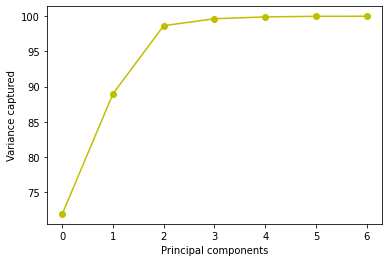

In [127]:
# INSERT your code (or comment) here
from sklearn.preprocessing import scale

#perform PCA using sklearn PCA implementation
from sklearn.decomposition import PCA
pca = PCA()
# featur_Scaledmatrix is fit to PCA
pca = pca.fit(featur_Scaledmatrix)
cumsum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(cumsum,marker='o', color='y')
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

In [130]:
#89% variance is applied
pca_89 = PCA(n_components= 0.89)
#fit transform is performed on featur_Scaledmatrix
fit_Transform89 = pca_89.fit_transform(featur_Scaledmatrix)
print("the minimum dimension that captures at least 89% variance is",pca_89.n_components_)

#99% variance is applied
pca_99 = PCA(n_components= 0.99)
#fit transform is performed on featur_Scaledmatrix
fit_Transform99= pca_99.fit_transform(featur_Scaledmatrix)
print("the minimum dimension that captures at least 99% variance is",pca_99.n_components_)

the minimum dimension that captures at least 89% variance is 3
the minimum dimension that captures at least 99% variance is 4


2. Determine the purity of clusters formed by the number of principal components which captured 89% and 99% variances respectively. Plot a line graph of the purity scores against the captured variances. Discuss your findings. __(7 marks)__

the purity score of the 89% variance is 92.38095238095238 %
the purity score of the 89% variance is 91.9047619047619 %


Text(0, 0.5, 'Purity scores')

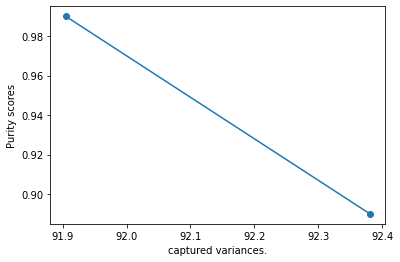

In [132]:
# INSERT your code (or comment) here
#Kmeans is applied with 3 clusters 
kmeans_89 = KMeans(n_clusters = 3).fit(fit_Transform89)
labels_89  = kmeans_89.labels_
#calling purity score function
purity89=purity_score(labels_89)*100
print('the purity score of the 89% variance is',purity89,'%')

#Count the number if the labeks in each cluster and save the data into clustering_classes

#Find the label that appear mostly each cluster and compute the purity score.

kmeans_99 = KMeans(n_clusters = 3).fit(fit_Transform99)
labels_99  = kmeans_99.labels_
#calling purity score function
purity99=purity_score(labels_99)*100
print('the purity score of the 89% variance is',purity99,'%')

purity_scores = [purity89, purity99] 
Variance = [0.89, 0.99]
plt.plot(purity_scores, Variance, marker='o')
plt.xlabel("captured variances.")
plt.ylabel("Purity scores")

3. Let's assume you have two datasets one is linear and another is curved structural data.
    - Can we apply PCA on these datasets? Justify your answer. __(3 marks)__ 

In [ ]:
# INSERT your code (or comment) here
Principal Component Analysis (PCA) can be applied on linear dataset because it is a linear dimensionality reduction method that can be used to collect data from a high-dimensional space
by translating it into a smaller sub-region. It aims to protect the critical components that have more data variability and to eliminate the 
non-essential components of less data variance.
Principal Component Analysis (PCA) can be applied on on curved structural data but the corelation between the points will not be good and PCA can also be applied only when we transform the data.